In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator


from keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


(60000, 28, 28)


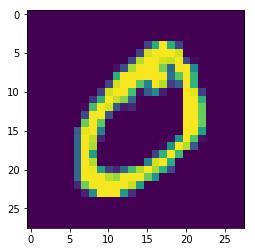

In [124]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
#X_train /= 255
#X_test /= 255

In [0]:
y_train[:10]
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [128]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [129]:
from keras.layers import Activation
from keras import regularizers
model = Sequential()
weight_decay = 1e-4
 
model.add(Convolution2D(16, 3, 3, input_shape=(28,28,1),kernel_regularizer=regularizers.l2(weight_decay))) #26
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(32, 3, 3, kernel_regularizer=regularizers.l2(weight_decay))) #24
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1, kernel_regularizer=regularizers.l2(weight_decay))) #22
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))#11

model.add(Convolution2D(16, 3, 3,kernel_regularizer=regularizers.l2(weight_decay)))#9
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, kernel_regularizer=regularizers.l2(weight_decay)))#7
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, kernel_regularizer=regularizers.l2(weight_decay)))#5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, kernel_regularizer=regularizers.l2(weight_decay)))#3
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(10, 4, 4, kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Activation('softmax'))
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(28, 28, 1..., kernel_regularizer=<keras.reg...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), kernel_regularizer=<keras.reg...)`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), kernel_regularizer=<keras.reg...)`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_22 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
activation_25 (Activation)   (None, 26, 26, 16)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_23 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
activation_26 (Activation)   (None, 24, 24, 32)        0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (4, 4), kernel_regularizer=<keras.reg...)`


In [0]:
from keras.models import model_from_json
def savemodel():
  model_json = model.to_json()
  with open('model.json', 'w') as json_file:
    json_file.write(model_json)
  model.save_weights('model.h5') 


def loadmodel():
  json_file = open('model.json', 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  model = model_from_json(loaded_model_json)
  model.load_weights('model.h5')

In [131]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

datagen = ImageDataGenerator(rescale= 1./255,    
                             featurewise_center=True,  
                             featurewise_std_normalization=True                           
                              )
datagen.fit(X_train)
datagen.fit(X_test)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

epochs = 40
best_accuracy = 0.0
best_epoch = 0

for epoch_num in range(epochs):
  print("Epoch no: " + str(epoch_num))
  result = model.fit(X_train, Y_train, batch_size=128, epochs=1, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])
  accuracy = float(result.history['val_acc'][0])
  if (accuracy > best_accuracy):
    best_accuracy = accuracy
    best_epoch = epoch_num
    savemodel()
    
print("Epoch " + str(best_epoch) + " has highest accuracy so far and accuracy is " + str(best_accuracy))

Epoch no: 0
Train on 60000 samples, validate on 10000 samples
Epoch 1/1

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 11s 185us/step - loss: 0.3903 - acc: 0.9298 - val_loss: 0.1217 - val_acc: 0.9828
Epoch no: 1
Train on 60000 samples, validate on 10000 samples
Epoch 1/1

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 8s 128us/step - loss: 0.1229 - acc: 0.9789 - val_loss: 0.0741 - val_acc: 0.9874
Epoch no: 2
Train on 60000 samples, validate on 10000 samples
Epoch 1/1

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 8s 128us/step - loss: 0.0896 - acc: 0.9830 - val_loss: 0.0691 - val_acc: 0.9876
Epoch no: 3
Train on 60000 samples, validate on 10000 samples
Epoch 1/1

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 8s 130us/st

In [0]:
def show_misclassified(X, Y_ohe, Y_pred, classes,
                       columns=5, total=25,
                       pick_randomly=True, image_size_multiplier=4):
    y_true = np.argmax(Y_ohe, axis=1)
    yp = np.argmax(Y_pred, axis=1)
    misclassified = y_true != yp
    X = X[misclassified]
    Y_ohe = Y_ohe[misclassified]
    Y_pred = Y_pred[misclassified]
    y_true = y_true[misclassified]
    yp = yp[misclassified]
    total = min(total, len(X))
    rows = int(np.ceil(total / columns))

    indexes = np.random.choice(len(X), total, replace=False) if pick_randomly else list(range(0, total))

    X = np.take(X, indexes, axis=0)
    Y_ohe = np.take(Y_ohe, indexes, axis=0)
    Y_pred = np.take(Y_pred, indexes, axis=0)
    y_true = np.take(y_true, indexes, axis=0)
    yp = np.take(yp, indexes, axis=0)

    fig_height = rows * image_size_multiplier * 2
    fig_width = columns * image_size_multiplier

    fig = plt.figure(figsize=(fig_width, fig_height))
    plt.subplots_adjust(bottom=0.1, top=1.0)
    idx1 = 0
    idx2 = 0
    jdx = 0
    for row in range(rows):
        for column in range(columns):
            if idx1 >= len(X):
                break
            img = X[idx1]
            assert (len(img.shape) == 3 and img.shape[2] in [1, 3, 4]) or len(img.shape) == 2
            ax = fig.add_subplot(rows * 2, columns, jdx + 1, xticks=[], yticks=[])
            cmap = None
            if (len(img.shape) == 3 and img.shape[2] == 1) or len(img.shape) == 2:
                cmap = "binary"
            if len(img.shape) == 3 and img.shape[2] == 1:
                img = img.reshape((img.shape[0], img.shape[1]))
            ax.imshow(img, cmap=cmap)
            ax.set_xlabel("Predicted = %s, Actual = %s" % (classes[yp[idx1]], classes[y_true[idx1]]))
            idx1 += 1
            jdx += 1

        for column in range(columns):
            if idx2 >= len(Y_pred):
                break
            yps = Y_pred[idx2]
            ax = fig.add_subplot(rows * 2, columns, jdx + 1, xticks=[], yticks=[])
            ind = np.arange(len(classes))
            rects = ax.bar(ind, yps, 0.25, label='Labels')
            ax.set_ylabel('Probability')
            ax.set_yticks(np.arange(0, 1.2, 0.2))
            ax.set_xticks(ind)
            ax.set_xticklabels(classes, rotation=90, ha='left')
            ax.legend()
            ax.tick_params(axis='both', which='major', labelsize=8)
            ax.tick_params(axis='both', which='minor', labelsize=6)
            idx2 += 1
            jdx += 1
    plt.show()

In [138]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, balanced_accuracy_score
predict = model.predict_classes(X_test)

d = {'pred': predict, 'true': np.argmax(Y_test,axis=1)} 
df = pd.DataFrame(data=d)
df2 = df[(df.pred != df.true)]

print("confusion matrix for 10 classes is below")
cm = confusion_matrix(y_test1,predict)
print(cm)

misclassified_image_count = df2.shape[0]
print("Out of 10000 images " + str(misclassified_image_count) +" images are misclassified")
#print(df2)

confusion matrix for 10 classes is below
[[ 976    0    1    0    0    1    1    1    0    0]
 [   0 1131    0    0    0    0    1    3    0    0]
 [   1    0 1028    0    0    0    1    2    0    0]
 [   0    0    2  997    0   10    0    0    0    1]
 [   0    0    0    0  975    0    1    0    1    5]
 [   0    0    0    1    0  890    1    0    0    0]
 [   3    1    0    0    0    1  953    0    0    0]
 [   0    3    8    0    0    1    0 1015    0    1]
 [   1    1    1    1    0    2    1    0  966    1]
 [   2    0    0    0    4    4    1    4    0  994]]
Out of 10000 images 75 images are misclassified
      pred  true
115      9     4
321      7     2
445      0     6
449      5     3
450      5     3
582      2     8
684      2     7
716      7     1
938      5     3
947      9     8
965      0     6
1014     5     6
1112     6     4
1156     5     7
1226     2     7
1232     4     9
1247     5     9
1260     1     7
1415     6     8
1878     3     8
1901     4     9
2130  